In [16]:
# Import all necessary libraries.
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

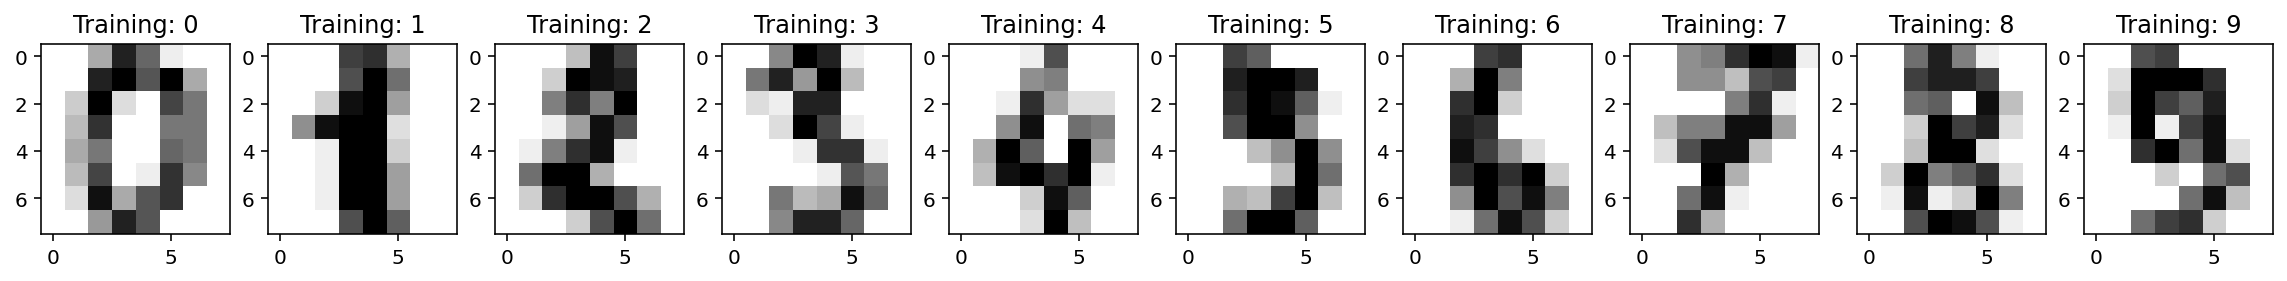

In [17]:
# Load the digits dataset.
digits = load_digits()

# Plot some digits from the data-set.
plt.figure(figsize=(20, 5))
for i in range(0,10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % digits.target[i])
plt.show()

# To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

In [18]:
knc = KNeighborsClassifier()
parameters = {'n_neighbors' :[1, 2, 3, 4, 5, 10, 15, 20], 'weights':['uniform', 'distance']}
print(parameters)
clf = GridSearchCV(knc, parameters, cv=5, verbose=3, n_jobs=-1)

clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'n_neighbors': [1, 2, 3, 4, 5, 10, 15, 20], 'weights': ['uniform', 'distance']}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.948, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...... n_neighbors=1, weights=uniform, score=0.983, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.983, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.965, total=   0.1s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ...... n_neighbors=1, weights=uniform, score=0.986, total=   0.1s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.948, total=   0.1s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.983, total=   0.1s
[CV] n_neighbors=1, weights=distance .................................
[CV] ..... n_neighbors=1, weights=distance, score=0.983, total=   0.2s
[CV] n_neighbors=1, weights=distance .................................
[CV] .

[CV] ..... n_neighbors=15, weights=uniform, score=0.924, total=   0.1s
[CV] n_neighbors=15, weights=uniform .................................
[CV] ..... n_neighbors=15, weights=uniform, score=0.965, total=   0.1s
[CV] n_neighbors=15, weights=uniform .................................
[CV] ..... n_neighbors=15, weights=uniform, score=0.927, total=   0.1s
[CV] n_neighbors=15, weights=uniform .................................
[CV] ..... n_neighbors=15, weights=uniform, score=0.958, total=   0.1s
[CV] n_neighbors=15, weights=uniform .................................
[CV] ..... n_neighbors=15, weights=uniform, score=0.972, total=   0.1s
[CV] n_neighbors=15, weights=distance ................................
[CV] .... n_neighbors=15, weights=distance, score=0.931, total=   0.1s
[CV] n_neighbors=15, weights=distance ................................
[CV] .... n_neighbors=15, weights=distance, score=0.969, total=   0.1s
[CV] n_neighbors=15, weights=distance ................................
[CV] .

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.3s finished


In [19]:
# Predict.
y_pred = clf.predict(x_test)
print('Accuracy of model is:', accuracy_score(y_test, y_pred)*100, '%')

Accuracy of model is: 95.55555555555556 %


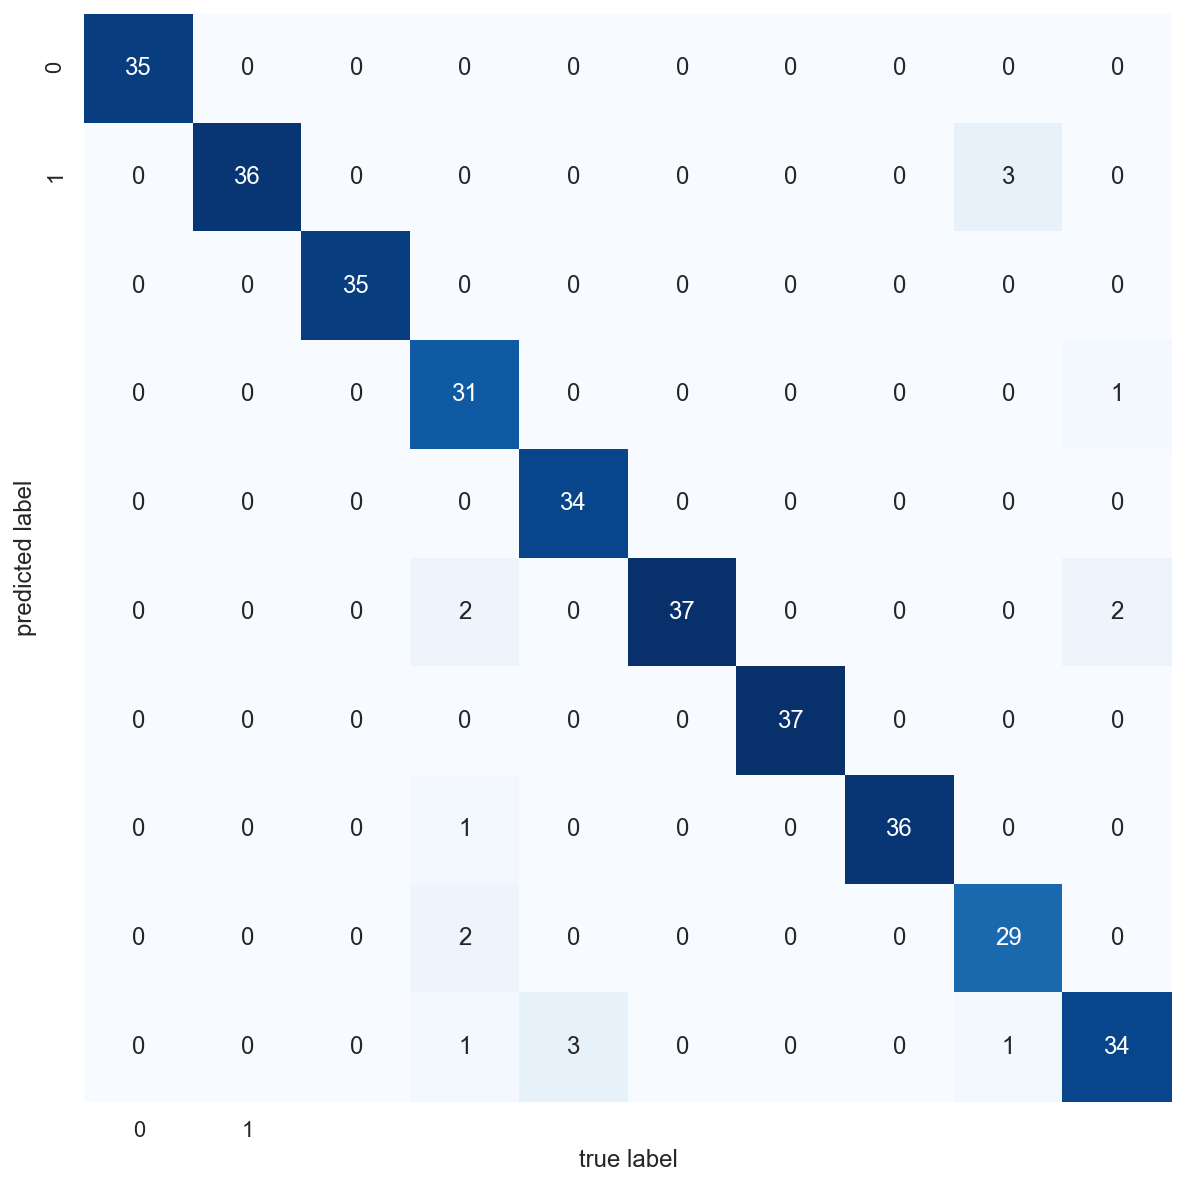

In [20]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(10,10))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix.png', dpi=600)
plt.show()

In [21]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        35
           3       0.97      0.84      0.90        37
           4       1.00      0.92      0.96        37
           5       0.90      1.00      0.95        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.94      0.88      0.91        33
           9       0.87      0.92      0.89        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

